In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


maxlen = 500
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)


model = Sequential([
    Embedding(10000, 64, input_length=maxlen),
    LSTM(100, return_sequences=True),
    Dropout(0.5),
    LSTM(100),
    Dropout(0.5),
    Dense(46, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)


test_loss, test_acc = model.evaluate(test_data, test_labels)


error_percentage = (1 - test_acc) * 100


print('Test accuracy:', test_acc)
print('Error percentage:', error_percentage)


2110848/2110848 [==============================] - 0s 0us/step
Epoch 1/10
225/225 [==============================] - 207s 900ms/step - loss: 2.4869 - accuracy: 0.3768 - val_loss: 2.0465 - val_accuracy: 0.4853
Epoch 2/10
225/225 [==============================] - 202s 898ms/step - loss: 1.8734 - accuracy: 0.5161 - val_loss: 1.7141 - val_accuracy: 0.5520
Epoch 3/10
225/225 [==============================] - 202s 899ms/step - loss: 1.7163 - accuracy: 0.5543 - val_loss: 1.6611 - val_accuracy: 0.5654
Epoch 4/10
225/225 [==============================] - 203s 902ms/step - loss: 1.5910 - accuracy: 0.5864 - val_loss: 1.6507 - val_accuracy: 0.5782
Epoch 5/10
225/225 [==============================] - 204s 910ms/step - loss: 1.4952 - accuracy: 0.6174 - val_loss: 1.5449 - val_accuracy: 0.6099
Epoch 6/10
225/225 [==============================] - 202s 897ms/step - loss: 1.3933 - accuracy: 0.6420 - val_loss: 1.5310 - val_accuracy: 0.6171
Epoch 7/10
225/225 [==============================] - 199s 88

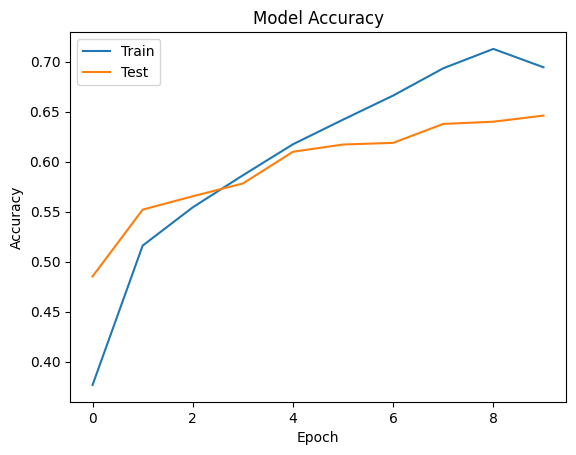

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
